# MSTICPy Settings 

This notebook takes you through setting up your MSTICPy configuration
for the first time. Some sections are specific to using MSTICPy
with Azure Sentinel.

You must have msticpy installed to run this notebook:
```
%pip install --upgrade msticpy
```

MSTICpy versions >= 1.0.0

In [1]:
from msticpy.config import MpConfigFile, MpConfigEdit

# Checking your settings
You can use MpConfigFile from the command line or as an interactive UI to do this.


In [2]:
mpconfig = MpConfigFile()
mpconfig.load_default()
mpconfig.view_settings()

## If you see nothing ...
...but a pair of curly braces in the settings view above it means
that you should set up a **msticpyconfig.yaml**

## If you know that you have configured a msticpyconfig file

You can search for this file using MpConfigFile. Click on **Load file**.

Once you've done that go to the [Setting the path to your msticpyconfig.yaml](#Setting-the-path-to-your-msticpyconfig.yaml)



# Import your Config.json and create a msticpyconfig.yaml [Azure Sentinel]

Follow these steps:
1. Run MpConfigFile
2. Locate your config.json
   - click **Load file** button
   - Browse - use the controls to navigate to find config.json
   - Search - set the starting directory to search and open the **Search** drop-down
   - When you see the file click on it and click **Select File** button (below the file browser)
   - optionally, click **View Settings** to confirm that this looks right
3. Convert to convert to msticpyconfig format
   - click **View Settings**
4. Save the file
   - type a path into the **Current file** text box
   - Click on **Save file**
5. You can set this file to always load by assigning the path to an environment variable.
   See [Setting the path to your msticpyconfig.yaml](#Setting-the-path-to-your-msticpyconfig.yaml)

In [3]:
mpconfig

### This is the equivalent from the command line

```python
mpconfig = MpConfigFile()
mpconfig.load_from_file("E:\\src\\asi-jupyter\\notebooks\\config.json")
mpconfig.map_json_to_mp_ws()
mpconfig.settings
```

# Edit your msticpyconfig settings

## Azure Sentinel Workspaces

If you loaded a config.json file you should see your workspace displayed. If not,
you can add one or more workspaces here. The Name, WorkspaceId and TenantId are
mandatory. The other fields are helpful but not essential.

Use the Help drop-down panel to find more information about adding workspaces and finding
the correct values for your workspace.

If this the workspace that you use frequently or all of the time, you may want to set this as the default.
This creates a duplicate entry named "Default" and this is used when you connect to AzureSentinel as
the default workspace to connect to (you can override this by specifying a workspace name at connect time).

When you've finished, type a file name (usually "msticpyconfig.yaml") into the **Conf File** text box
and click **Save File**,

You can also try the **Validate Settings** button. This should show that you have a few missing
sections (we'll fill these in later) but should show nothing under the the "Type Validation Results".

In [5]:
mpedit = MpConfigEdit(settings=mpconfig)
mpedit

Label(value='Loading. Please wait.')

# Setting the path to your msticpyconfig.yaml

This is a good point to set up an environment variable so that
you can keep a single configuration file in a known location and always
load the same settings. (Of course, you're free to use multiple configs
if you need to use different settings for each notebook folder)

- decide on a location for your `msticpyconfig.yaml` - this could be in "~/.msticpyconfig.yaml" or "%userprofile%/msticpyconfig.yaml"
- copy the `msticpyconfig.yaml` file that you just created to this location.
- set the `MSTICPYCONFIG` environment variable to point to that location:

## Windows
Open **Settings** and navigate to **System**->**About** and click on **Advanced System Settings**
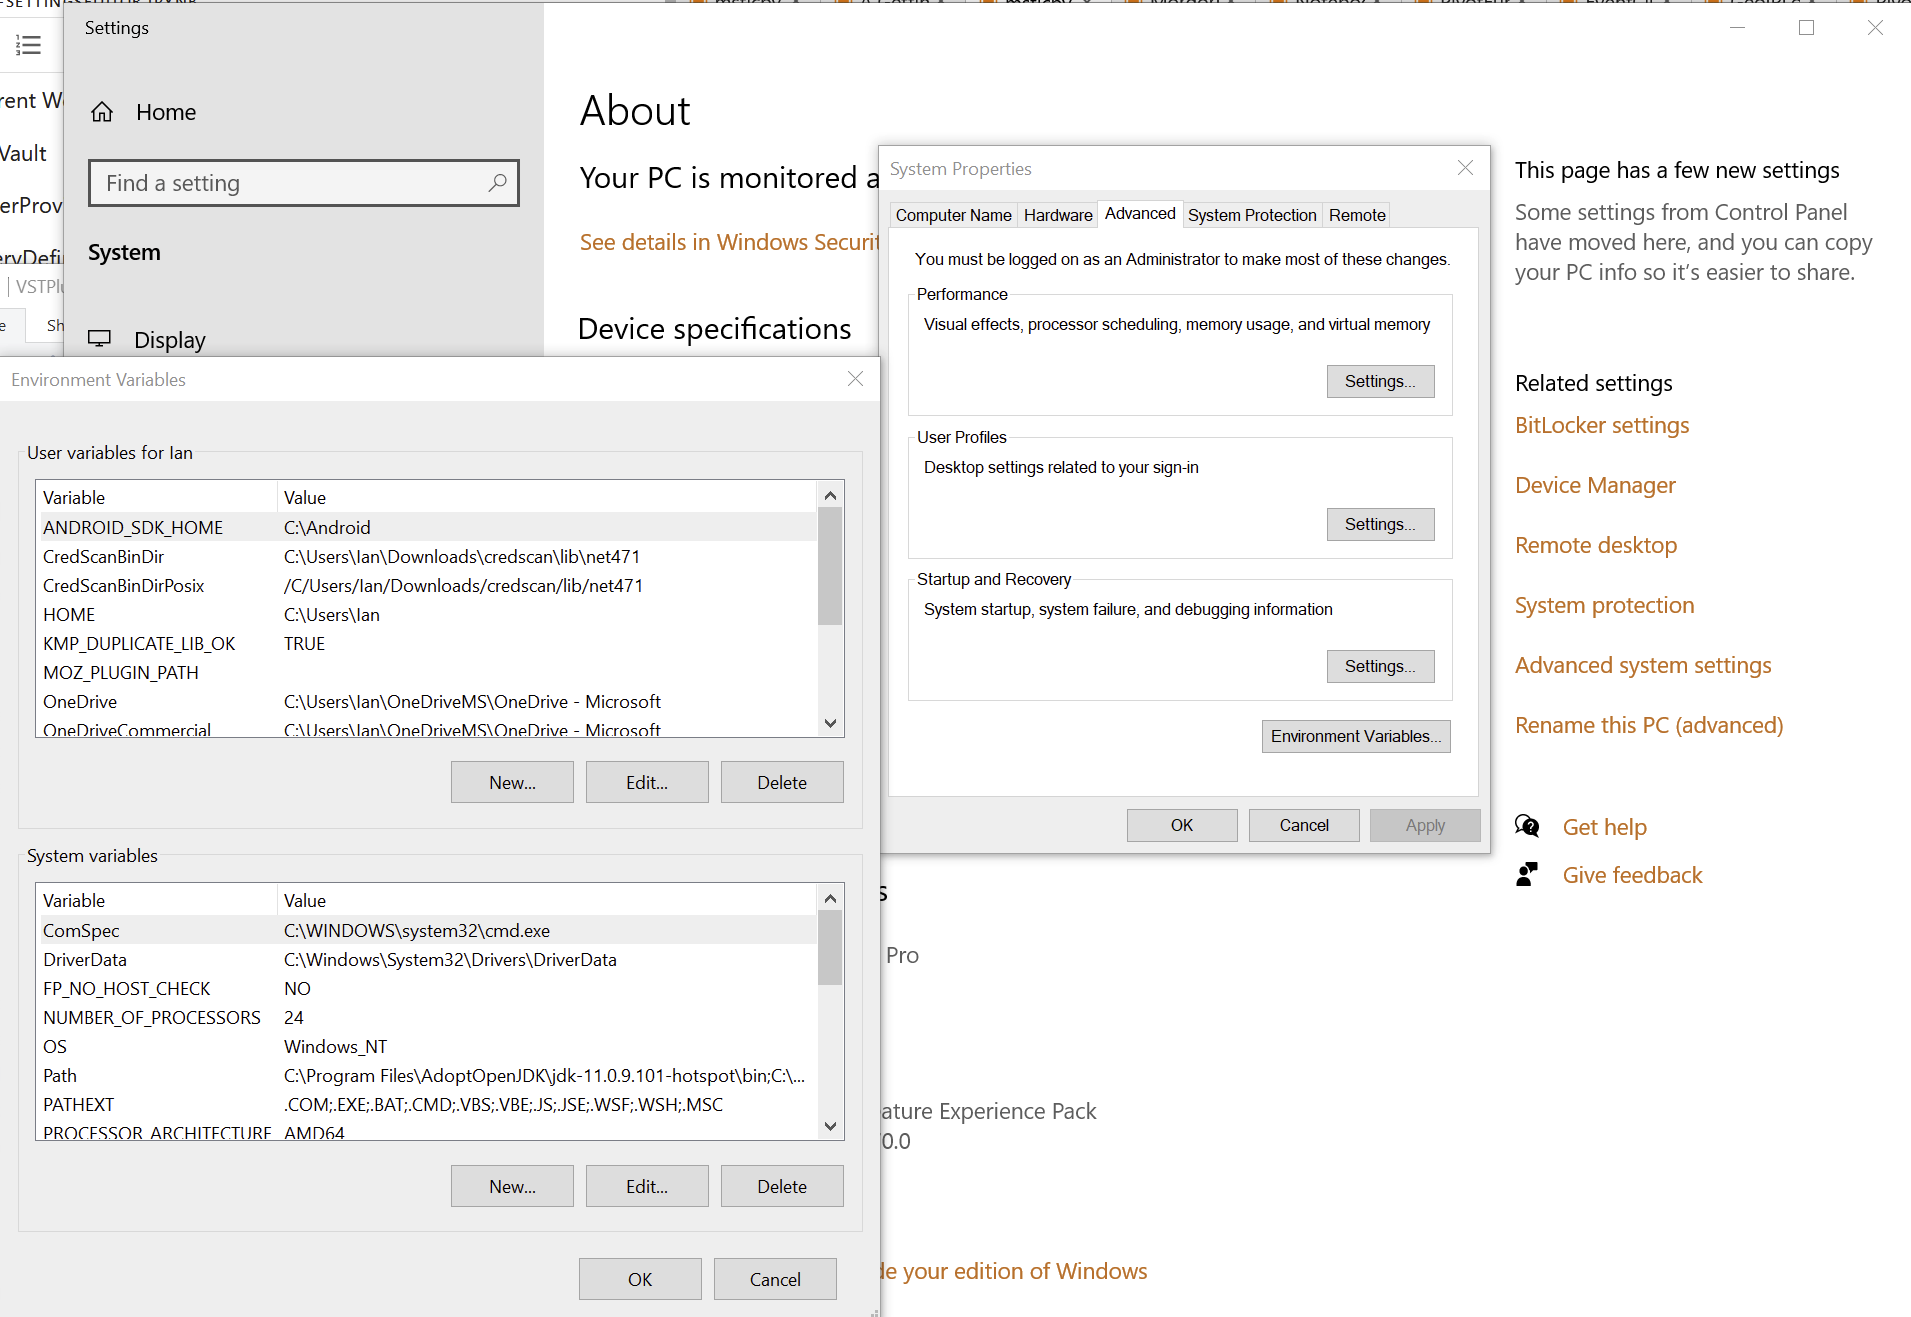

## Linux
In your .bashrc (or somewhere else convenient) add:

`export MSTICPYCONFIG=~/.msticpyconfig.yaml`


## Test auto-loading your msticpyconfig.yaml

- In the cell below replace the "./msticpyconfig2.yaml" with the filename
  from the previous step
- Run the cell (Ctrl-Enter or Shift-Enter)

You should see the settings editor loaded with the settings you created earlier

> **Note** the environment variable set here is not persistent<br>
> To make this persistent you need to add it to a startup file like
> .bashrc or your Windows registry.

In [6]:
%env MSTICPYCONFIG=./msticpyconfig2.yaml
mpedit = MpConfigEdit()
mpedit

env: MSTICPYCONFIG=./msticpyconfig2.yaml


Label(value='Loading. Please wait.')

e:\src\msticpy\msticpy\config\mp_config_file.py:121: UserWarning: MSTICPYCONFIG env variable is pointing to invalid path../msticpyconfig2.yaml
  warnings.warn(


# More Settings
## Adding Threat Intel (TI) Providers

You will likely want to do lookups of IP Addresses, URLs and other items to check for any Threat Intelligence reports.
To do that you need to add the providers that you want to use. Most TI providers require that you
have an account with them and supply an API key or other authentication items when you connect.

Most providers have a free use tier (or in cases like AlienVault OTX) are entirely free.
Free tiers for paid providers usually impose a certain number of requests that you
can make in a given time period.

For account creation, each provider does this slightly differently.
Use the help links in the editor help to find where to go set each of these up.

Assuming that you have done this, we can configure a provider. Be sure to
store any authentication keys somewhere safe (and memorable).

We are going to use [VirusTotal](https://www.virustotal.com) (VT) as an example TI Provider.
For this you will need a VirusTotal API key from the 
[VirusTotal](https://developers.virustotal.com/v3.0/reference#getting-started) website.<br>
We also support a range of other threat intelligence providers - you can read about this here [MSTICPy TIProviders](https://msticpy.readthedocs.io/en/latest/data_acquisition/TIProviders.html)
<br><br>
Taking VirusTotal as our example.
- Click on the **TI Providers** tab
- Select "VirusTotal" from the **New prov** drop-down list
- Click **Add**

This should show you the values that you need to provide:
- a single item **AuthKey** (this is usually referred to as an "API Key"

You can paste the key into the **Value** field and click the **Save** button.

You can opt to store the VT AuthKey as an environment variable. This is a bit more secure than 
having it laying around in configuration files.
Assuming that you have set you VT key as an environment variable
```bash
set VT_KEY=VGhpcyBzaG91bGQgc2hvdyB5b3UgdGhlIHZhbHVlcyB  (Windows)
export VT_KEY=VGhpcyBzaG91bGQgc2hvdyB5b3UgdGhlIHZhbHVlcyB  (Linux/MAC)
```
Flip the **Storage** radio button to **EnvironmentVar** and type the name of the
variable (`VT_KEY` in our example) into the value box.

You can also use Azure Key Vault to store secrets like these but we will need to 
set up the Key Vault settings before this will work.

Click the **Save File** button to save your changes.

In [7]:
mpedit.set_tab("TI Providers")
mpedit

### Test that it works

This assumes that you have set an enviroment variable pointed at your msticpyconfig.yaml.
Use the MpConfigFile tool to force MSTICPy to reload settings from the disk.

In [ ]:
mpconfig.refresh_mp_config()

# import the TI module
from msticpy.context import TILookup
result = TILookup().lookup_ioc('ed01ebfbc9eb5bbea545af4d01bf5f1071661840480439c6e5babe8e080e41aa')
TILookup.result_to_df(result)

## Adding GeoIP Providers

MSTICPy supports two Geo IP providers - Maxmind GeoIPLite and IP Stack.
The main difference between the two is that Maxmind downloads and uses a local
database, while IPStack is a purely online solution.

For either you need API keys to either download the free database from MaxMind
or access the IPStack online lookup

We'll use GeoIPLite as our example.
You can sign up for a free account and API key at https://www.maxmind.com/en/geolite2/signup.
You'll need the API for the following steps.
- Select "GeoIPLite" from the **New Prov**
- Click **Add**
- Paste your Maxmind key into the **Value** field

Set the maxmind data folder:
- This defaults to "~/.msticpy"
  - On Windows this translates to the foldername `%USERPROFILE%/.msticpy`.
  - On Linux/Mac this translates to the folder `.msticpy` in your home folder.
- This is where the downloaded GeopIP database will be stored.
- Choose another folder name and location if you prefer.

> **Note**: as with the TI providers you can opt to store your key
> as an environment variable or keep it in Key Vault.


In [9]:
mpedit.set_tab("GeoIP Providers")
mpedit

### Test that it works

In [ ]:
mpconfig.refresh_mp_config()

from msticpy.sectools import IPStackLookup
geoip = IPStackLookup()
geoip.lookup_ip("52.96.165.18")[1][0]

In [ ]:
mpconfig.refresh_mp_config()

from msticpy.sectools import GeoLiteLookup
geoip = GeoLiteLookup()
geoip.lookup_ip("52.96.165.18")[1][0]

# Optional Settings
## Other data providers - Splunk, Azure CLI, LocalData, Mordor

### Azure API and Azure Sentinel API
To access Azure APIs (such as the Sentinel APIs or Azure resource APIs) 
you need to be able to use Azure Authentication.
The setting is named "AzureCLI" for historical reasons - don't let that confuse you.
We currently support two ways of authenticating:
1.  Chained chained authentication (recommended)
2.  With a client app ID and secret

The former can try up to four methods of authentication:
- Using creds set in environment variables
- Using creds available in an AzureCLI logon
- Using the Managed Service Identity (MSI) credentials of the machine you are
  running the notebook kernel on
- Interactive browser logon

To use chained authentication methods select the methods to want to use and leave
the clientId/tenantiId/clientSecret fields empty.

### Splunk
The Splunk provider has many options. Typically you need only:
- host (your Splunk server host name)
- username
- password
(You can also supply some or all of these values at startup)

## LocalData
This is a data provider that reads from local CSVs or Pickled pandas DataFrames

You can set the default data paths that it looks in for data files. This can
have multiple values - put each on a new line.

## Mordor
The mordor provider has two options:
- The path to save temporary downloaded files (default is the current directory)
- Whether to cache files or delete them immediately after download.

In [ ]:
mpedit.set_tab("Data Providers")
mpedit

## Key Vault

You only need this if you want to store secrets in Azure Key Vault.

You need to create the Key Vault first - do that at your Azure portal.
Here is the link for the 
[global KeyVault management portal](https://ms.portal.azure.com/#blade/HubsExtension/BrowseResource/resourceType/Microsoft.KeyVault%2Fvaults)

The required settings are all values that you get from the Vault properties (albeit a couple
of them have different names)
- **VaultName** is show at the top left of the properties screen
- **TenantId** is shown as *Directory ID*
- **AzureRegion** is shown as *Location*
- **Authority** is the cloud for your Azure service.

> **Note**: cCurrently we've only implemented and tested "global" fully but if<br>
> you are using a regional or national cloud and this isn't working please<br>
> let us know [msticpy@microsoft.com](mailto:msticpy@microsoft.com) and
> we'll get it fixed.
  
Click **Save** and then **Save File** when you are done.

In [ ]:
mpedit.set_tab("Key Vault")
mpedit

### Test Key Vault

See if you can connect and view any secrets. Of course nothing will show
up if you haven't entered a secret. Add a test secret to the vault to show
here.

- Refresh settings
- Try to connect and display secrets

> **WARNING** ***don't leave this output in your saved notebook.***<br>
> If there are real secrets in the output, use the notebook **Clear output** before saving the notebook.<br>
> Also delete cached copies of this notebook.
> Look in the `.ipynb_checkpoints` sub-folder of this folder and delete copies of this notebook.

In [ ]:
mpconfig.refresh_mp_config()
mpconfig.show_kv_secrets()

## Autoload QueryProvs

This section controls which, if any query providers you want to load automatically
when you run `nbinit.init_notebook`.

This can save a lot of time if you are frequently authoring new notebooks. It also
allows the right providers to be loaded before other components that might use them such as
- Pivot functions
- Notebooklets
(more about these in the next section)

There are two types of provider support:
- Azure Sentinel - here you specify both the provider name and the workspace name that you want to connect to.
- Other providers - for other query providers, just specify the name of the provider.

Available Azure Sentinel workspaces are taken from the items you configured in the **Azure Sentinel** tab.
Other providers are taken from the list of available provider types in *MSTICPy*.

There are two options for each of these:
- **connect** - if this is True (checked) *MSTICPy* will try to authenticate to the
  provider backend immediately after loading. This assumes that you've configured
  credentials for the provider in your settings.
  Note: if this is not set it defaults to True.
- **alias** - when MSTICPy loads a provider it assigns it to a Python variable name.
  By default this is "qry_*workspace_name*" for Azure Sentinel providers and
  "qry_*provider_name*" for other providers. If you want to use something a bit shorter
  and easier to type/remember you can add a *alias*. The variable name created
  will be "qry_*alias*"
  
> **Note** if you lose track of which providers have been loaded by
> this mechanism they are added to the `current_providers` attribute of
> `msticpy`
```python
   import msticpy
   msticpy.current_providers
```

In [ ]:
mpedit.set_tab("Autoload QueryProvs")
mpedit

## Autoload Component
This section controls which, if other components you want to load automatically
when you run `nbinit.init_notebook()`.

This includes
- TILookup - the Threat Intel provider library
- GeopIP - the Geo ip provider that you want to use
- AzureData - the module used to query details about Azure resources
- AzureSentinelAPI - the module used to query the Azure Sentinel API
- Notebooklets - loads notebooklets from the [msticnb package](https://msticnb.readthedocs.io/en/latest/)
- Pivot - pivot functions

These are loaded in this order, since the Pivot component needs query and other providers
loaded in order to find the pivot functions that it will attach to entities.
For more information see [pivot functions](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html)

Some components do not require any parameters (e.g. TILookup and Pivot). Others do support or require additional
settings:

**GeoIpLookup**

You must type the name of the GeoIP provider that you want to use - either "GeoLiteLookup" or "IPStack"

**AzureData** and **AzureSentinelAPI**
- **auth_methods** - override the default settings for AzureCLI and connect using the selected methods
- **connnect** - set to false to load but not connect

**Notebooklets**

This has a single parameter block **AzureSentinel**. At minumum you
should specify the workspace name. This needs to be in the following
format:
```
    workspace:WORKSPACENAME
```
WORKSPACENAME must be one of the workspaces defined in the Azure Sentinel tab.

You can also add addition parameters to send to the notebooklets init function:
Specify these as addition key:value pairs, separated by newlines.
```
    workspace:WORKSPACENAME
    providers=["LocalData","geolitelookup"]
```
See the 
[msticnb `init` documentation](https://msticnb.readthedocs.io/en/latest/msticnb.html#msticnb.data_providers.init)
for more details


In [ ]:
mpedit.set_tab("Autoload Components")
mpedit

# Using `MpConfigFile` to check and manage your msticpyconfig.yaml

This tool lets you:
- Load your default settings (pointed to by the MSTICPYCONFIG environment variable)
  - `mpconfig.load_default()` method or just create `mpconfig = MpConfigFile()` with no parameters
- Load a different settings file - `mpconfig.load_from_file(file_path)`
- Save the loaded config to a different file name - `mpconfig.save_to_file(file_path)`
- Validate the settings in the loaded file - `mpconfig.validate_settings()`
- Browse/Search for a file - `mpconfig.browse_for_file()`
- View the text of the settings file - `mpconfig.view_settings()`

There are also a couple of utility methods:
- `mpconfig.show_kv_secrets()` - to view secrets in your Key Vault (more on this below)
- `mpconfig.map_json_to_mp_ws()` - you can load an AzureSentinel `config.json` file and map
  its settings into a format compatible with `msticpyconfig.yaml`
- `mpconfig.refresh_mp_config()` - reloads the settings for MSTICPy based on the saved default
  config file (this is either the file pointed to by MSTICPYCONFIG env variable or 
  a file "msticpyconfig.yaml" in the current directory.
  
You can get more information on these methods by entering:
```
help(MpConfigFile)
```